In [2]:
# data 시각화 라이브러리 import 하기
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Python 데이터 분석 패키지 Pandas 불러오기
import pandas as pd

# 동시 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

#### 데이터 불러오기


In [3]:
df = pd.read_csv('./data/event_log.csv')
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


In [4]:
len(df)

# df.event_time type 확인
df.event_time.dtypes

885129

dtype('O')

In [10]:
# 날짜 관련한 다양한 함수를 쓰기 위해
# event time type을 string에서 datetime으로 바꾸기 

df['event_time'] = pd.to_datetime(df['event_time'], format='%Y-%m-%d %H:%M:%S %Z')

# 날짜 10월 1일 부터 2월28일로 전과 동일하게 바꾸기
df = df.loc[(df['event_time'] > '2020-10-01')]
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,order_month
28074,2020-10-01 00:01:36+00:00,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10
28075,2020-10-01 00:04:11+00:00,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10
28076,2020-10-01 00:07:23+00:00,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10
28077,2020-10-01 00:07:56+00:00,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10
28078,2020-10-01 00:08:11+00:00,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10


In [11]:
# event_time type 다시 확인
df.event_time.dtypes

datetime64[ns, UTC]

In [12]:
# 구매 연도-월 형태의 필드를 생성
df['order_month']=df['event_time'].dt.strftime('%Y-%m')
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,order_month
28074,2020-10-01 00:01:36+00:00,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10
28075,2020-10-01 00:04:11+00:00,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10
28076,2020-10-01 00:07:23+00:00,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10
28077,2020-10-01 00:07:56+00:00,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10
28078,2020-10-01 00:08:11+00:00,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10


In [13]:
# event_type 이 구매인 경우 필터링
order_data = df.loc[df.event_type == "purchase"]
order_data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,order_month
28089,2020-10-01 00:16:49+00:00,purchase,455054,2144415938886238754,furniture.living_room.shelving,NaN,27.30,1515915625521279407,Wxlmf9UuHZ,2020-10
28094,2020-10-01 00:21:18+00:00,purchase,455054,2144415938886238754,furniture.living_room.shelving,NaN,27.30,1515915625521279407,Wxlmf9UuHZ,2020-10
28104,2020-10-01 00:31:26+00:00,purchase,1400177,2144415922528452715,electronics.telephone,NaN,19.52,1515915625521280982,EZdDgY36Lh,2020-10
28117,2020-10-01 00:39:19+00:00,purchase,1006569,2144415930019479855,electronics.telephone,NaN,12.70,1515915625521281502,wMoJBWUEvr,2020-10
28118,2020-10-01 00:39:19+00:00,purchase,1034353,2144415922528452715,electronics.telephone,NaN,28.41,1515915625521281502,wMoJBWUEvr,2020-10


In [14]:
# user_id를 index로 설정
# 추후 index 기준으로 data join 예정
order_data.set_index('user_id',inplace=True)
order_data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_session,order_month
user_id,,,,,,,,,
1515915625521279407,2020-10-01 00:16:49+00:00,purchase,455054,2144415938886238754,furniture.living_room.shelving,NaN,27.30,Wxlmf9UuHZ,2020-10
1515915625521279407,2020-10-01 00:21:18+00:00,purchase,455054,2144415938886238754,furniture.living_room.shelving,NaN,27.30,Wxlmf9UuHZ,2020-10
1515915625521280982,2020-10-01 00:31:26+00:00,purchase,1400177,2144415922528452715,electronics.telephone,NaN,19.52,EZdDgY36Lh,2020-10
1515915625521281502,2020-10-01 00:39:19+00:00,purchase,1006569,2144415930019479855,electronics.telephone,NaN,12.70,wMoJBWUEvr,2020-10
1515915625521281502,2020-10-01 00:39:19+00:00,purchase,1034353,2144415922528452715,electronics.telephone,NaN,28.41,wMoJBWUEvr,2020-10


In [15]:
# 연도-월 형태의 필드를 생성
df['year_month']=df['event_time'].dt.strftime('%Y-%m')
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,order_month,year_month
28074,2020-10-01 00:01:36+00:00,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10,2020-10
28075,2020-10-01 00:04:11+00:00,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10,2020-10
28076,2020-10-01 00:07:23+00:00,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10,2020-10
28077,2020-10-01 00:07:56+00:00,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10,2020-10
28078,2020-10-01 00:08:11+00:00,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10,2020-10


In [20]:
# 유저 별 첫번째 구매월을 추출
# group by: user_id 별로 order_month 가 제일 작은 경우
first_order = order_data.groupby('user_id')['order_month'].min()
first_order.head()

user_id
1515915625353286099    2020-10
1515915625353534622    2020-10
1515915625353561691    2020-11
1515915625353900095    2020-10
1515915625354561351    2020-10
Name: order_month, dtype: object

In [21]:
# 기존 order_data 에 첫번째 구매월에 대한 정보를 추가
order_data = order_data.merge(first_order.rename("first_order_month").to_frame(), left_index=True, right_index=True)
order_data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_session,order_month,first_order_month
user_id,,,,,,,,,,
1515915625353286099,2020-10-03 11:23:44+00:00,purchase,1023383,2144415922016747613,computers.peripherals.wifi,zyxel,119.03,p5I1h2vk1T,2020-10,2020-10
1515915625353534622,2020-10-06 10:01:55+00:00,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10,2020-10
1515915625353534622,2020-10-06 10:03:42+00:00,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10,2020-10
1515915625353534622,2020-10-06 10:29:25+00:00,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10,2020-10
1515915625353561691,2020-11-24 17:37:22+00:00,purchase,1507368,2144415922016747613,computers.peripherals.wifi,keenetic,172.86,UmL0qYoQh4,2020-11,2020-11


In [22]:
# index 다시 해제
order_data.reset_index(inplace=True)
order_data.head()

,user_id,event_time,event_type,product_id,category_id,category_code,brand,price,user_session,order_month,first_order_month
0,1515915625353286099,2020-10-03 11:23:44+00:00,purchase,1023383,2144415922016747613,computers.peripherals.wifi,zyxel,119.03,p5I1h2vk1T,2020-10,2020-10
1,1515915625353534622,2020-10-06 10:01:55+00:00,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10,2020-10
2,1515915625353534622,2020-10-06 10:03:42+00:00,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10,2020-10
3,1515915625353534622,2020-10-06 10:29:25+00:00,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10,2020-10
4,1515915625353561691,2020-11-24 17:37:22+00:00,purchase,1507368,2144415922016747613,computers.peripherals.wifi,keenetic,172.86,UmL0qYoQh4,2020-11,2020-11


In [26]:
# 첫 구매월 별 다음 달의 구매 건수 변화
first_order_user_data = order_data.groupby(['first_order_month', 'order_month'])['user_id'].nunique()
first_order_user_data

first_order_month  order_month
2020-10            2020-10        3796
                   2020-11          67
                   2020-12          17
                   2021-01           4
                   2021-02           4
2020-11            2020-11        4261
                   2020-12          68
                   2021-01          26
                   2021-02           7
2020-12            2020-12        3784
                   2021-01          68
                   2021-02          21
2021-01            2021-01        4673
                   2021-02         117
2021-02            2021-02        4192
Name: user_id, dtype: int64

In [28]:
cohorts=first_order_user_data.reset_index()
cohorts.head()

,first_order_month,order_month,user_id
0,2020-10,2020-10,3796
1,2020-10,2020-11,67
2,2020-10,2020-12,17
3,2020-10,2021-01,4
4,2020-10,2021-02,4


In [29]:
# 필드 user_id 의 이름을 total_user 로 변경
cohorts.rename({'user_id':'total_users'}, axis=1, inplace=True)
cohorts.head()

,first_order_month,order_month,total_users
0,2020-10,2020-10,3796
1,2020-10,2020-11,67
2,2020-10,2020-12,17
3,2020-10,2021-01,4
4,2020-10,2021-02,4


In [30]:
# 데이터 타입 확인
cohorts.first_order_month.dtypes

dtype('O')

In [31]:
# 코호트 분석을 위해, 첫 구매월과 구매월의 차이를 계산
# 기존 함수를 이용하기 위해, string 을 datetime으로 바꾸고 to_period 함수를 사용

cohorts["first_order_month_dt"] = pd.to_datetime(cohorts.first_order_month, format='%Y-%m')
cohorts["order_month_dt"] = pd.to_datetime(cohorts.order_month, format='%Y-%m')

In [32]:
# 함수 사용 후 데이터 타입 확인
cohorts.first_order_month_dt.dtypes

dtype('<M8[ns]')

In [34]:
# period 객체로 변환
cohorts.order_month_dt.dt.to_period('M')
# integer 로 변경
cohorts.order_month_dt.dt.to_period('M').astype(int)

0     2020-10
1     2020-11
2     2020-12
3     2021-01
4     2021-02
5     2020-11
6     2020-12
7     2021-01
8     2021-02
9     2020-12
10    2021-01
11    2021-02
12    2021-01
13    2021-02
14    2021-02
Name: order_month_dt, dtype: period[M]

0     609
1     610
2     611
3     612
4     613
5     610
6     611
7     612
8     613
9     611
10    612
11    613
12    612
13    613
14    613
Name: order_month_dt, dtype: int64

In [36]:
# 첫 구매월과 구매월의 차이 구하기
cohorts['month_diff'] = (
     cohorts.order_month_dt.dt.to_period('M').astype(int) 
     - cohorts.first_order_month_dt.dt.to_period('M').astype(int)
)

cohorts.head()

,first_order_month,order_month,total_users,first_order_month_dt,order_month_dt,month_diff
0,2020-10,2020-10,3796,2020-10-01,2020-10-01,0
1,2020-10,2020-11,67,2020-10-01,2020-11-01,1
2,2020-10,2020-12,17,2020-10-01,2020-12-01,2
3,2020-10,2021-01,4,2020-10-01,2021-01-01,3
4,2020-10,2021-02,4,2020-10-01,2021-02-01,4


In [37]:
cohorts = cohorts[['first_order_month','month_diff','total_users']]
cohorts.set_index(['first_order_month','month_diff'],inplace=True)
cohorts.head()

total_users
first_order_month month_diff             
2020-10           0                  3796
                  1                    67
                  2                    17
                  3                     4
                  4                     4

In [38]:
# 재구화를 통해 wide로 변환
cohorts = cohorts['total_users'].unstack(1)
cohorts

month_diff,0,1,2,3,4
first_order_month,,,,,
2020-10,3796.0,67.0,17.0,4.0,4.0
2020-11,4261.0,68.0,26.0,7.0,NaN
2020-12,3784.0,68.0,21.0,NaN,NaN
2021-01,4673.0,117.0,NaN,NaN,NaN
2021-02,4192.0,NaN,NaN,NaN,NaN


In [40]:
# 재구매율로 표현하기
reorder_rate=cohorts.divide(cohorts[0],axis=0)
reorder_rate

# 첫 구매월 이후를 보기 위해 
# 첫 구매월 제거 한 후 확인

reorder_rate.iloc[:, 1:]

month_diff,0,1,2,3,4
first_order_month,,,,,
2020-10,1.0,0.017650,0.004478,0.001054,0.001054
2020-11,1.0,0.015959,0.006102,0.001643,NaN
2020-12,1.0,0.017970,0.005550,NaN,NaN
2021-01,1.0,0.025037,NaN,NaN,NaN
2021-02,1.0,NaN,NaN,NaN,NaN


month_diff,1,2,3,4
first_order_month,,,,
2020-10,0.017650,0.004478,0.001054,0.001054
2020-11,0.015959,0.006102,0.001643,NaN
2020-12,0.017970,0.005550,NaN,NaN
2021-01,0.025037,NaN,NaN,NaN
2021-02,NaN,NaN,NaN,NaN


Text(0.5, 1.0, '유저의 첫 구매월 이후 재구매율 변화')

Text(0.5, 10.5, '첫 구매 이후 개월수')

Text(28.5, 0.5, '첫 구매월')

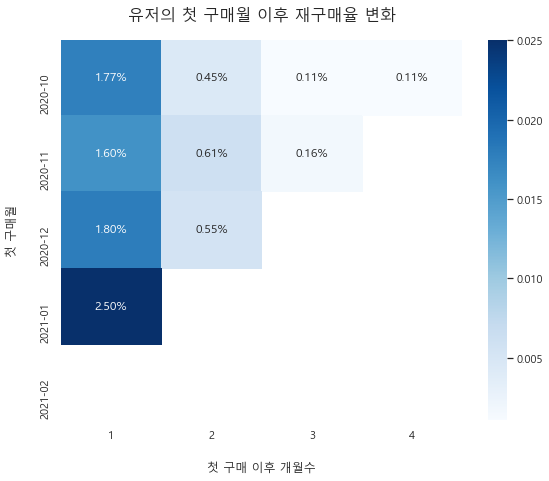

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="pastel") # 테마를 설정한다
plt.rc('font', family='Malgun Gothic') # 폰트를 설정한다


g = sns.heatmap(reorder_rate.iloc[:, 1:], annot=True, fmt='.2%', cmap="Blues")

g.figure.set_size_inches(9, 7) # 그래프의 크기를 키운다
g.set_title("유저의 첫 구매월 이후 재구매율 변화", pad=20, size=16) # pad 그래프와 제목 사이의 간격을 조정합니다.
g.set_xlabel("첫 구매 이후 개월수",labelpad = 20, size = 12) # 라벨의 이름, 라벨과 축 사이의 간격, 폰트를 설정한다.
g.set_ylabel("첫 구매월",labelpad = 20, size = 12) # 라벨의 이름, 라벨과 축 사이의 간격, 폰트를 설정한다.
sns.set_theme(style="whitegrid", palette="pastel") # 테마를 설정한다


In [42]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,order_month,year_month
28074,2020-10-01 00:01:36+00:00,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10,2020-10
28075,2020-10-01 00:04:11+00:00,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10,2020-10
28076,2020-10-01 00:07:23+00:00,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10,2020-10
28077,2020-10-01 00:07:56+00:00,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10,2020-10
28078,2020-10-01 00:08:11+00:00,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10,2020-10
...,...,...,...,...,...,...,...,...,...,...,...
885124,2021-02-28 23:55:01+00:00,view,953226,2144415927553229037,NaN,NaN,219.94,1515915625611023730,FRLqIttxKU,2021-02,2021-02
885125,2021-02-28 23:58:05+00:00,view,1715907,2144415927049912542,electronics.video.tv,starwind,80.03,1515915625611024014,g6WqPf50Ma,2021-02,2021-02
885126,2021-02-28 23:58:09+00:00,view,4170534,2144415939364389423,electronics.clocks,amazfit,64.92,1515915625611024020,xNIJBqZdkd,2021-02,2021-02
885127,2021-02-28 23:58:14+00:00,view,888273,2144415921932861531,electronics.telephone,NaN,10.16,1515915625611024030,9pCbKMIcSx,2021-02,2021-02


#### 재방문율로 cohort 해보기

In [56]:
# 연도-월 형태의 필드를 생성합니다.
df['year_month']=df['event_time'].dt.strftime('%Y-%m')
df.head()

# 방문은 어떤 이벤트라도 발생하면 방문으로 정의
visit_data = df[['event_time', 'user_id', 'user_session', 'year_month']]
visit_data.set_index('user_id',inplace=True)
visit_data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,order_month,year_month
28074,2020-10-01 00:01:36+00:00,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10,2020-10
28075,2020-10-01 00:04:11+00:00,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10,2020-10
28076,2020-10-01 00:07:23+00:00,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10,2020-10
28077,2020-10-01 00:07:56+00:00,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10,2020-10
28078,2020-10-01 00:08:11+00:00,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10,2020-10


,event_time,user_session,year_month
user_id,,,
1515915625520113390,2020-10-01 00:01:36+00:00,4X2NwIInsI,2020-10
1515915625521278799,2020-10-01 00:04:11+00:00,daM8ubpOfo,2020-10
1515915625521278938,2020-10-01 00:07:23+00:00,EdgYsorbdC,2020-10
1515915625520113390,2020-10-01 00:07:56+00:00,4X2NwIInsI,2020-10
1515915625521279091,2020-10-01 00:08:11+00:00,Et4GWStGMB,2020-10


In [53]:
first_visit = visit_data.groupby('user_id')['year_month'].min()
first_visit.head()

user_id
1515915625353226922    2020-10
1515915625353230067    2020-10
1515915625353230683    2020-11
1515915625353230922    2020-10
1515915625353234047    2020-10
Name: year_month, dtype: object

In [54]:
visit_data = visit_data.merge(
    first_visit.rename("first_visit_month").to_frame(), 
    left_index=True, 
    right_index=True
)
visit_data.head()

,event_time,user_session,year_month,first_visit_month
user_id,,,,
1515915625353226922,2020-10-29 11:28:35+00:00,7qejzWzHlR,2020-10,2020-10
1515915625353230067,2020-10-06 06:30:32+00:00,ikPKHkuRhA,2020-10,2020-10
1515915625353230683,2020-11-09 08:52:51+00:00,dn9FkZ11dA,2020-11,2020-11
1515915625353230683,2020-11-09 09:04:34+00:00,dn9FkZ11dA,2020-11,2020-11
1515915625353230683,2020-11-09 09:08:53+00:00,dn9FkZ11dA,2020-11,2020-11


In [57]:
# 유저 별 첫번째 방문월을 추출.
first_visit = visit_data.groupby('user_id')['year_month'].min()
first_visit.head()

# 기존 visit_data 에 첫번째 방문월에 대한 정보를 추가
visit_data = visit_data.merge(
    first_visit.rename("first_visit_month").to_frame(), 
    left_index=True, 
    right_index=True
)
visit_data.head()

# index 를 다시 해제
visit_data.reset_index(inplace=True)
visit_data.head()


# 첫 방문월 별로 다음 달의 구매건수 변화
visit_cohorts = visit_data.groupby(['first_visit_month', 'year_month'])['user_id'].nunique()
visit_cohorts.head(20)



user_id
1515915625353226922    2020-10
1515915625353230067    2020-10
1515915625353230683    2020-11
1515915625353230922    2020-10
1515915625353234047    2020-10
Name: year_month, dtype: object

,event_time,user_session,year_month,first_visit_month
user_id,,,,
1515915625353226922,2020-10-29 11:28:35+00:00,7qejzWzHlR,2020-10,2020-10
1515915625353230067,2020-10-06 06:30:32+00:00,ikPKHkuRhA,2020-10,2020-10
1515915625353230683,2020-11-09 08:52:51+00:00,dn9FkZ11dA,2020-11,2020-11
1515915625353230683,2020-11-09 09:04:34+00:00,dn9FkZ11dA,2020-11,2020-11
1515915625353230683,2020-11-09 09:08:53+00:00,dn9FkZ11dA,2020-11,2020-11


,user_id,event_time,user_session,year_month,first_visit_month
0,1515915625353226922,2020-10-29 11:28:35+00:00,7qejzWzHlR,2020-10,2020-10
1,1515915625353230067,2020-10-06 06:30:32+00:00,ikPKHkuRhA,2020-10,2020-10
2,1515915625353230683,2020-11-09 08:52:51+00:00,dn9FkZ11dA,2020-11,2020-11
3,1515915625353230683,2020-11-09 09:04:34+00:00,dn9FkZ11dA,2020-11,2020-11
4,1515915625353230683,2020-11-09 09:08:53+00:00,dn9FkZ11dA,2020-11,2020-11


first_visit_month  year_month
2020-10            2020-10       84216
                   2020-11        2387
                   2020-12         758
                   2021-01         504
                   2021-02         322
2020-11            2020-11       90213
                   2020-12        1879
                   2021-01         798
                   2021-02         557
2020-12            2020-12       69500
                   2021-01        1648
                   2021-02         716
2021-01            2021-01       78306
                   2021-02        2166
2021-02            2021-02       70845
Name: user_id, dtype: int64

In [58]:
visit_cohorts=visit_cohorts.reset_index()
visit_cohorts.head()

,first_visit_month,year_month,user_id
0,2020-10,2020-10,84216
1,2020-10,2020-11,2387
2,2020-10,2020-12,758
3,2020-10,2021-01,504
4,2020-10,2021-02,322


In [59]:
# 필드 user_id 의 이름을 total_user 로 변경
visit_cohorts.rename({'user_id':'total_users'}, axis=1, inplace=True)
visit_cohorts.head()

# 각 첫 방문월 별로 월 수기 잘 분포되어 있는지 확인
each_period=visit_cohorts['first_visit_month'].value_counts().sort_index()
each_period

,first_visit_month,year_month,total_users
0,2020-10,2020-10,84216
1,2020-10,2020-11,2387
2,2020-10,2020-12,758
3,2020-10,2021-01,504
4,2020-10,2021-02,322


2020-10    5
2020-11    4
2020-12    3
2021-01    2
2021-02    1
Name: first_visit_month, dtype: int64

In [60]:
# 코호트 분석을 위해, 첫 방문월과 방문월의 차이를 계산 gkrh
# 함수를 이용하기 위해, string 을 datetime으로 바꾸고 to_period 함수를 사용

visit_cohorts["first_visit_month_dt"] = pd.to_datetime(visit_cohorts.first_visit_month, format='%Y-%m')
visit_cohorts["visit_month_dt"] = pd.to_datetime(visit_cohorts.year_month, format='%Y-%m')

visit_cohorts['month_diff'] = (
     visit_cohorts.visit_month_dt.dt.to_period('M').astype(int) 
     - visit_cohorts.first_visit_month_dt.dt.to_period('M').astype(int)
)
 
visit_cohorts.head()

,first_visit_month,year_month,total_users,first_visit_month_dt,visit_month_dt,month_diff
0,2020-10,2020-10,84216,2020-10-01,2020-10-01,0
1,2020-10,2020-11,2387,2020-10-01,2020-11-01,1
2,2020-10,2020-12,758,2020-10-01,2020-12-01,2
3,2020-10,2021-01,504,2020-10-01,2021-01-01,3
4,2020-10,2021-02,322,2020-10-01,2021-02-01,4


In [61]:
visit_cohorts = visit_cohorts[['first_visit_month','month_diff','total_users']]
visit_cohorts.set_index(['first_visit_month','month_diff'],inplace=True)
visit_cohorts.head()

# 재구조화를 통한 wide로 변경
visit_cohorts = visit_cohorts['total_users'].unstack(1)
visit_cohorts

total_users
first_visit_month month_diff             
2020-10           0                 84216
                  1                  2387
                  2                   758
                  3                   504
                  4                   322

month_diff,0,1,2,3,4
first_visit_month,,,,,
2020-10,84216.0,2387.0,758.0,504.0,322.0
2020-11,90213.0,1879.0,798.0,557.0,NaN
2020-12,69500.0,1648.0,716.0,NaN,NaN
2021-01,78306.0,2166.0,NaN,NaN,NaN
2021-02,70845.0,NaN,NaN,NaN,NaN


In [62]:
# 재방문율로 표현하기
revisit_rate=visit_cohorts.divide(visit_cohorts[0],axis=0)
revisit_rate

month_diff,0,1,2,3,4
first_visit_month,,,,,
2020-10,1.0,0.028344,0.009001,0.005985,0.003824
2020-11,1.0,0.020828,0.008846,0.006174,NaN
2020-12,1.0,0.023712,0.010302,NaN,NaN
2021-01,1.0,0.027661,NaN,NaN,NaN
2021-02,1.0,NaN,NaN,NaN,NaN


Text(0.5, 1.0, '유저의 첫 방문월 이후 재방문율 변화')

Text(0.5, 10.5, '첫 방문 이후 개월수')

Text(28.5, 0.5, '첫 방문월')

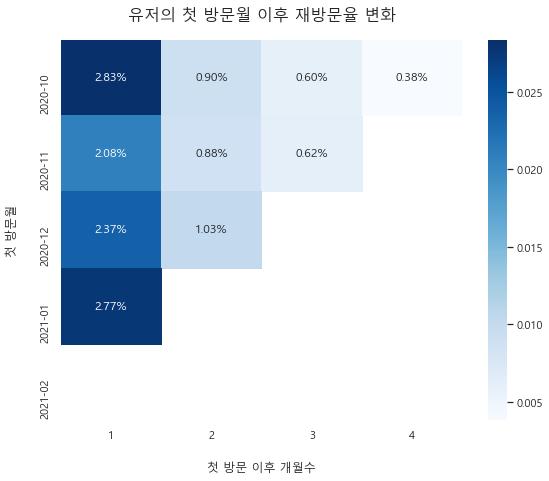

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="pastel") # 테마를 설정한다
plt.rc('font', family='Malgun Gothic') # 폰트를 설정한다


g = sns.heatmap(revisit_rate.iloc[:, 1:], annot=True, fmt='.2%', cmap="Blues")

g.figure.set_size_inches(9, 7) # 그래프의 크기를 키운다
g.set_title("유저의 첫 방문월 이후 재방문율 변화", pad=20, size=16) # pad 그래프와 제목 사이의 간격을 조정합니다.
g.set_xlabel("첫 방문 이후 개월수",labelpad = 20, size = 12) # 라벨의 이름, 라벨과 축 사이의 간격, 폰트를 설정한다.
g.set_ylabel("첫 방문월",labelpad = 20, size = 12) # 라벨의 이름, 라벨과 축 사이의 간격, 폰트를 설정한다.
sns.set_theme(style="whitegrid", palette="pastel") # 테마를 설정한다